# WF-samples start here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    print("Number of total (including modified) peptides in "+file+" "+str(len(data.index)))
    for_stdev.append(len(data.index))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4]) #this can be changed to view different amounts of AA
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide'].apply(lambda x: x[-1::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count', 'N-cut', 'C-cut','First aa','Last aa']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)

print("Standard deviation: "+ str(np.std(for_stdev)))
print("Total amount of peptides "+str(total_number_of_peptides))
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides with feature>=4: "+str(len(df.index)))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
df.head()

Number of total (including modified) peptides in peptide _WF1.xlsx 3687
Number of un-modified peptides in peptide _WF1.xlsx 3140
Number of total (including modified) peptides in peptide_WF2.xlsx 4220
Number of un-modified peptides in peptide_WF2.xlsx 3637
Number of total (including modified) peptides in peptide_WF3.xlsx 2960
Number of un-modified peptides in peptide_WF3.xlsx 2564
Number of total (including modified) peptides in peptide_WF4.xlsx 2423
Number of un-modified peptides in peptide_WF4.xlsx 2094
Number of total (including modified) peptides in peptide_WF5.xlsx 3367
Number of un-modified peptides in peptide_WF5.xlsx 2920
Standard deviation: 613.2629452363807
Total amount of peptides 14355
Average length: 12.688956433637285
Average mass: 1407.546652841664
Total number of peptides with feature>=4: 1974
Number of peptides with feature>=4: 1974, in percent: 13.751306165099269 %


,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut,First aa,Last aa
Accession,,,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.595800,8.0,14.917000,161,23.0,8.0,38.0,53.0,38.0,5,PSLQ,APVR,P,R
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,1859.410673,18.0,73.682667,67,12.0,13.0,16.0,18.0,8.0,5,AVGK,GMAF,A,F
sp|P06727|APOA4_HUMAN,NHQLEGLTF,1058.240900,9.0,65.527167,66,10.0,15.0,13.0,15.0,13.0,5,NHQL,GLTF,N,F
sp|P06727|APOA4_HUMAN,SLAELGGHLDQQVEEF,1771.564000,16.0,99.716833,66,16.0,13.0,11.0,14.0,12.0,5,SLAE,VEEF,S,F
sp|Q14624|ITIH4_HUMAN,NFRPGVL,801.941700,7.0,39.656000,61,13.0,13.0,14.0,9.0,12.0,5,NFRP,PGVL,N,L


In [2]:
def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters
aminoacids= get_letter_frequency(df['Peptide']*df['count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['count'])
First_aa=get_letter_frequency(df['First aa']*df['count'])
Last_aa=get_letter_frequency(df['Last aa']*df['count'])
aminoacids

{'A': 3156,
 'G': 4614,
 'V': 3622,
 'L': 5648,
 'I': 1740,
 'P': 3674,
 'F': 3450,
 'W': 256,
 'M': 965,
 'S': 3702,
 'T': 3008,
 'C': 0,
 'Y': 1143,
 'N': 1530,
 'Q': 1889,
 'K': 2060,
 'R': 1054,
 'H': 1283,
 'D': 3046,
 'E': 4533}

## Graph of aminoacid frequency in complete sequences

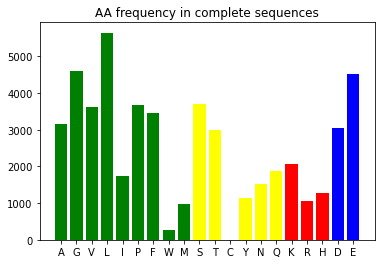

In [3]:
color=['green', 'green','green','green','green','green','green','green','green','yellow','yellow','yellow','yellow','yellow','yellow','red','red','red','blue','blue','blue']
plt.bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
plt.xticks(range(len(aminoacids)), list(aminoacids.keys()))
plt.title('AA frequency in complete sequences')
plt.show()

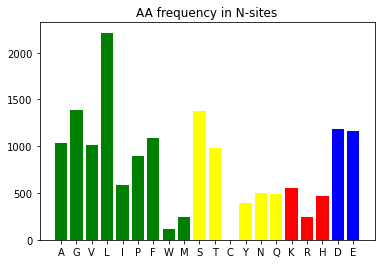

In [4]:
plt.bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(N_aminoacids)), list(N_aminoacids.keys()))
plt.title('AA frequency in N-sites')
plt.show()

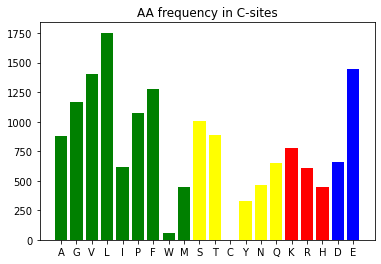

In [5]:
plt.bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(C_aminoacids)), list(C_aminoacids.keys()))
plt.title('AA frequency in C-sites')
plt.show()

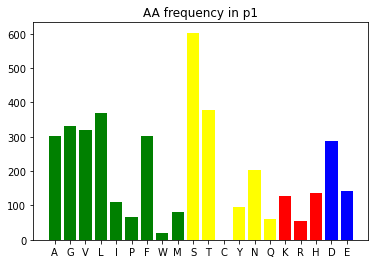

In [6]:
color=['green', 'green','green','green','green','green','green','green','green','yellow','yellow','yellow','yellow','yellow','yellow','red','red','red','blue','blue','blue']
plt.bar(range(len(First_aa)), list(First_aa.values()), align='center', color=color)
plt.xticks(range(len(First_aa)), list(First_aa.keys()))
plt.title('AA frequency in p1')
plt.show()

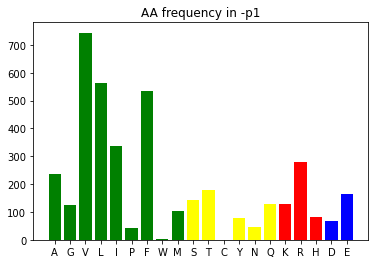

In [7]:
color=['green', 'green','green','green','green','green','green','green','green','yellow','yellow','yellow','yellow','yellow','yellow','red','red','red','blue','blue','blue']
plt.bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
plt.xticks(range(len(Last_aa)), list(Last_aa.keys()))
plt.title('AA frequency in -p1')
plt.show()

### How does feature and count correlate in these samples? Are there certain peptides with abnormal feature?

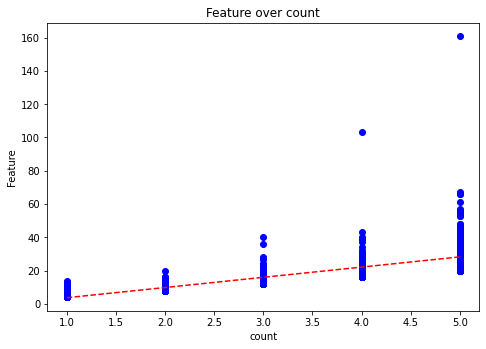

[ 6.12735666 -2.34968614]


In [8]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [9]:
df.sort_values(['#Feature'], ascending=False).head()

,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut,First aa,Last aa
Accession,,,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.595800,8.0,14.917000,161,23.0,8.0,38.0,53.0,38.0,5,PSLQ,APVR,P,R
sp|P01009|A1AT_HUMAN,AVLTIDEKGTEAAGAMF,1738.844700,17.0,67.552500,103,6.0,0.0,47.0,12.0,38.0,4,AVLT,GAMF,A,F
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,1859.410673,18.0,73.682667,67,12.0,13.0,16.0,18.0,8.0,5,AVGK,GMAF,A,F
sp|P06727|APOA4_HUMAN,NHQLEGLTF,1058.240900,9.0,65.527167,66,10.0,15.0,13.0,15.0,13.0,5,NHQL,GLTF,N,F
sp|P06727|APOA4_HUMAN,SLAELGGHLDQQVEEF,1771.564000,16.0,99.716833,66,16.0,13.0,11.0,14.0,12.0,5,SLAE,VEEF,S,F


### What are the most frequent N,C-terminals and what is their sequence? How often are they found? Are there outliers? OOPS: Mass length etc are fucked

In [10]:
#Here we sort on the C and N-cut

df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N=df_N.sort_values(['count'], ascending=False)
df_N=df_N.drop(['Mass','Length','RT'], axis=1)
#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C=df_C.drop(['Mass','Length','RT'], axis=1)
df_C=df_C.sort_values(['#Feature'], ascending=False)

df_N.head()


#Feature  #Feature WF1  #Feature WF2  \
Accession            N-cut                                         
sp|P69905|HBA_HUMAN  TYFP        235          56.0          55.0   
sp|P02671|FIBA_HUMAN DTAS        151          19.0          30.0   
                     STGK        136          22.0          36.0   
                     FDTA        137          20.0          38.0   
sp|P69905|HBA_HUMAN  SLDK        153          44.0          43.0   

                            #Feature WF 3  #Feature WF4  #Feature WF5  count  
Accession            N-cut                                                    
sp|P69905|HBA_HUMAN  TYFP            59.0          10.0          55.0     39  
sp|P02671|FIBA_HUMAN DTAS            42.0          36.0          24.0     31  
                     STGK            39.0          30.0           9.0     31  
                     FDTA            33.0          21.0          25.0     30  
sp|P69905|HBA_HUMAN  SLDK            26.0           0.0          40.0     30

N_count: 72 , C_count: 79


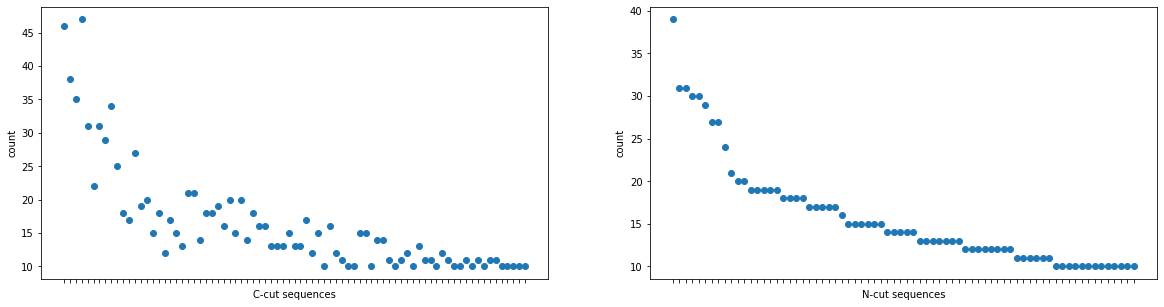

In [11]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

df_N.reset_index(['Accession'], inplace=True)
df_C.reset_index(['Accession'], inplace=True)
N_count_10=len(df_N.loc[(df_N['count'] >= 10)].index)
C_count_10=len(df_C.loc[(df_C['count'] >= 10)].index)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0
print("N_count: "+str(N_count_10)+" , C_count: "+str(C_count_10))

### What are the most frequent groups of AA at the N,C-terminal? Are there any favoured combinations?

In [12]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut
df_N=df_N.drop(['Mass', 'Length','RT'], axis=1)
df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)
df_C=df_C.drop(['Mass', 'Length','RT'], axis=1)
df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['count','#Feature'], ascending=False)
df_C.head()

,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count
C-grouped,,,,,,,
NNNN,1307,262.0,247.0,287.0,176.0,333.0,247
NPNN,1012,224.0,312.0,184.0,132.0,160.0,216
NANN,709,142.0,167.0,160.0,121.0,119.0,156
PNNN,593,102.0,150.0,99.0,85.0,157.0,138
NNPN,652,131.0,159.0,162.0,90.0,110.0,132


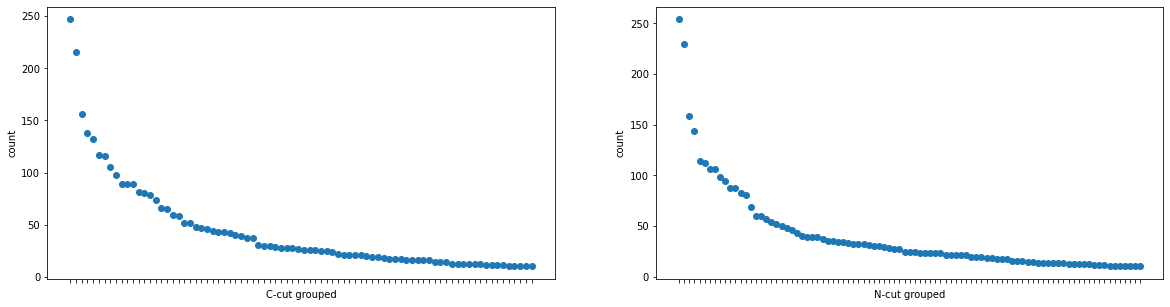

In [13]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


# Infected samples start here

In [20]:
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    for_stdev.append(len(data.index))
    print("Number of modified peptides in "+file+" "+str(len(data.index)))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature Sample 31','#Feature Sample 34', '#Feature Sample 39','count', 'N-cut', 'C-cut']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)
print("Standard deviation: "+str(np.std(for_stdev)))
print("Total amount of peptides "+str(total_number_of_peptides))
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides with feature>=4: "+str(len(df.index)))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
aminoacids= get_letter_frequency(df['Peptide']*df['count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['count'])
print(aminoacids)
df.head()

Number of modified peptides in peptide_sample_31.xlsx 5103
Number of un-modified peptides in peptide_sample_31.xlsx 4055
Number of modified peptides in peptide_sample_34.xlsx 1412
Number of un-modified peptides in peptide_sample_34.xlsx 1218
Number of modified peptides in peptide_sample_39.xlsx 4929
Number of un-modified peptides in peptide_sample_39.xlsx 3817
Standard deviation: 1700.4262864221887
Total amount of peptides 9090
Average length: 13.731363331094695
Average mass: 1494.5794611588155
Total number of peptides with feature>=4: 1489
Number of peptides with feature>=4: 1489, in percent: 16.38063806380638 %
{'A': 3679, 'G': 2527, 'V': 2677, 'L': 2982, 'I': 320, 'P': 1577, 'F': 1232, 'W': 307, 'M': 413, 'S': 1751, 'T': 1605, 'C': 0, 'Y': 633, 'N': 1085, 'Q': 570, 'K': 2102, 'R': 799, 'H': 1578, 'D': 1813, 'E': 1852}


,Peptide,Mass,Length,RT,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count,N-cut,C-cut
Accession,,,,,,,,,,,
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,1251.1440,12.0,86.333333,115,40.0,15.0,60.0,3,AGVA,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,1179.9429,11.0,75.975000,109,42.0,12.0,55.0,3,GVAN,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,1023.8530,9.0,59.131667,96,35.0,9.0,52.0,3,ANAL,HKYH
sp|P68871|HBB_HUMAN,VHLTPEEKSAV,1208.6400,11.0,50.666667,78,28.0,14.0,36.0,3,VHLT,KSAV
sp|P69905|HBA_HUMAN,STVLTSKYR,1053.5818,9.0,119.810000,77,21.0,15.0,41.0,3,STVL,SKYR


In [ ]:
plt.bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
plt.xticks(range(len(aminoacids)), list(aminoacids.keys()))
plt.title('AA frequency in complete sequences')
plt.show()

In [ ]:
plt.bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(N_aminoacids)), list(N_aminoacids.keys()))
plt.title('AA frequency in N-sites')
plt.show()

In [ ]:
plt.bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(C_aminoacids)), list(C_aminoacids.keys()))
plt.title('AA frequency in C-sites')
plt.show()

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [ ]:
color=['green', 'green','green','green','green','green','green','green','green','yellow','yellow','yellow','yellow','yellow','yellow','red','red','red','blue','blue','blue']
plt.bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
plt.xticks(range(len(Last_aa)), list(Last_aa.keys()))
plt.title('AA frequency in -p1')
plt.show()

In [ ]:
df.sort_values(['#Feature'], ascending=False)[0:30]

In [ ]:
#Here we sort on the C and N-cut

df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N=df_N.sort_values(['count'], ascending=False)
df_N=df_N.drop(['Mass','Length','RT'], axis=1)
#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C=df_C.drop(['Mass','Length','RT'], axis=1)
df_C=df_C.sort_values(['count'], ascending=False)

df_N.head()


In [ ]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

df_N.reset_index(['Accession'], inplace=True)
df_C.reset_index(['Accession'], inplace=True)
#N_count_10=len(df_N.loc[(df_N['count'] >= 10)].index)
#C_count_10=len(df_C.loc[(df_C['count'] >= 10)].index)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0
print("N_count: "+str(C_count_10)+ ", C_count: "+str(N_count_10))

In [ ]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut
df_N=df_N.drop(['Mass', 'Length','RT'], axis=1)
df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)
df_C=df_C.drop(['Mass', 'Length','RT'], axis=1)
df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['count','#Feature'], ascending=False)
df_N.head()

In [ ]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
#df_N = df_N.loc[(df_N['count'] >= 10)] 
#df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


# Non-infected samples start here

In [ ]:
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    for_stdev.append(len(data.index))
    print("Number of modified peptides in "+file+" "+str(len(data.index)))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature Sample 13','#Feature Sample 21', '#Feature Sample 33','count', 'N-cut', 'C-cut']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)

print("Standard deviation: "+str(np.std(for_stdev)))
print("Total amount of peptides "+str(total_number_of_peptides))
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides with feature>=4: "+str(len(df.index)))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
aminoacids= get_letter_frequency(df['Peptide']*df['count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['count'])
First_aa=get_letter_frequency(df['First aa']*df['count'])
Last_aa=get_letter_frequency(df['Last aa']*df['count'])
df.head()

In [ ]:
 df.loc[(df.index == 'sp|P02671|FIBA_HUMAN')][0:30]

In [ ]:
plt.bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
plt.xticks(range(len(aminoacids)), list(aminoacids.keys()))
plt.title('AA frequency in total sequences')
plt.show()

In [ ]:
plt.bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(N_aminoacids)), list(N_aminoacids.keys()))
plt.title('AA frequency in N-sites')
plt.show()

In [ ]:
plt.bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
plt.xticks(range(len(C_aminoacids)), list(C_aminoacids.keys()))
plt.title('AA frequency in C-sites')
plt.show()

In [ ]:
color=['green', 'green','green','green','green','green','green','green','green','yellow','yellow','yellow','yellow','yellow','yellow','red','red','red','blue','blue','blue']
plt.bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
plt.xticks(range(len(Last_aa)), list(Last_aa.keys()))
plt.title('AA frequency in -p1')
plt.show()

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [ ]:
df.sort_values(['#Feature'], ascending=False).head()

In [ ]:
#Here we sort on the C and N-cut

df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N=df_N.sort_values(['count'], ascending=False)
df_N=df_N.drop(['Mass','Length','RT'], axis=1)
#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C=df_C.drop(['Mass','Length','RT'], axis=1)
df_C=df_C.sort_values(['count'], ascending=False)

df_C.head()


In [ ]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

#df_N.reset_index(['Accession'], inplace=True)
#df_C.reset_index(['Accession'], inplace=True)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5)) 
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0
print("N_count: "+str(C_count_10)+ ", C_count: "+str(N_count_10))

In [ ]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut
df_N=df_N.drop(['Mass', 'Length','RT'], axis=1)
df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)
df_C=df_C.drop(['Mass', 'Length','RT'], axis=1)
df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['#Feature'], ascending=False)
df_C.head()

In [ ]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0
